Let's build a directed acyclic graph (DAG) of 常用 kanji relations through their radicals

In [5]:
from jamdict import Jamdict
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
#matplotlib.font_manager._rebuild()

font_path = "/usr/share/fonts/truetype/takao-gothic/TakaoGothic.ttf"
my_font = matplotlib.font_manager.FontProperties(fname=font_path)
matplotlib.rcParams['font.family'] = my_font.get_name()

In [6]:
my_font.get_family()

['TakaoGothic']

Next, initialize all the important stuff

In [7]:
jmd = Jamdict()
kanjis = jmd.krad
G = nx.DiGraph()
df_jouyou = pd.read_csv('../data/onyomi_statistics.csv', sep='\t',names=['kanji','read'])
jouyou = list(df_jouyou['kanji'])

Building the DAG. We crawl the Kanjis one-by-one and add an edge from the component to the kanji, provided the component (radical) is a kanji itself.

In [9]:
for k in jouyou:
    neighPool = kanjis[k]
    for n in neighPool:
        if n in jouyou and not G.has_edge(n,k) and n != k:
            G.add_edge(n,k)

In [10]:
pos = nx.spring_layout(G)

In [1]:
'''fig, ax = plt.subplots(figsize=(50,50))
nx.draw_networkx(G, pos, with_labels=True, arrowsize=6,font_size=13,font_family="TakaoGothic" , ax=ax, node_size=0, width=0.05)
fig.savefig("dag_2k_strict_big.png")'''

'fig, ax = plt.subplots(figsize=(50,50))\nnx.draw_networkx(G, pos, with_labels=True, arrowsize=6,font_size=13,font_family="TakaoGothic" , ax=ax, node_size=0, width=0.05)\nfig.savefig("dag_2k_strict_big.png")'

In [108]:
len(G.nodes)

1897

In [101]:
len(G.edges)

3701

In [58]:
nx.ancestors(G,"獄")

{'大', '犬', '言'}

In [63]:
nx.descendants(G,"犬")

{'伏', '然', '燃', '状', '献', '獄', '獣', '黙'}

In [106]:
nx.is_directed_acyclic_graph(G)

True

In [107]:
nx.dag_longest_path(G)

['文', '斉', '済']

So paths are very short, this would mean that this network is very wide and shallow. This is a consequence of only taking jouyou radicals. So more depth will be acquired by taking non-jouyou (Kanji only ??) radicals of Jouyou kanji too. 

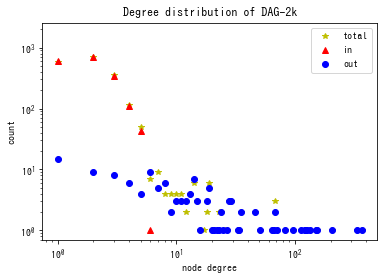

In [16]:
from collections import Counter

plt.figure()
degrees = [G.degree(n) for n in G.nodes()]
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

degree, count = zip(*sorted(dict(Counter(degrees)).items(), key=lambda tup: tup[0]))
in_degree, in_count = zip(*sorted(dict(Counter(in_degrees)).items(), key=lambda tup: tup[0]))
out_degree, out_count = zip(*sorted(dict(Counter(out_degrees)).items(), key=lambda tup: tup[0]))

plt.loglog(degree,count,'*y', label="total")
plt.loglog(in_degree,in_count,'^r', label="in")
plt.loglog(out_degree,out_count,'ob', label="out")

plt.xlabel("node degree")
plt.ylabel("count")
plt.title("Degree distribution of DAG-2k")
plt.legend()
plt.show()

In [1]:
import os

In [2]:
'''fig, ax = plt.subplots(figsize=(50,50))
nx.draw_networkx(G, pos, with_labels=True, node_color=out_degrees,cmap="summer" ,arrowsize=6,font_size=13,font_family="TakaoGothic",font_color="w" , ax=ax, node_size=240, width=0.05)
fig.savefig("dag_2k_strict_big_color.png")'''

'fig, ax = plt.subplots(figsize=(50,50))\nnx.draw_networkx(G, pos, with_labels=True, node_color=out_degrees,cmap="summer" ,arrowsize=6,font_size=13,font_family="TakaoGothic",font_color="w" , ax=ax, node_size=240, width=0.05)\nfig.savefig("dag_2k_strict_big_color.png")'